In [38]:
import os

In [3]:
import pandas as pd

In [4]:
project_path  = 'C:\Rajesh Goel - Data Science\HACKATHONS-master\HACKATHONS-master\Analytics vidya\Food Demand Forecasting/'

In [5]:
os.chdir(project_path)

In [6]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 7CA2-5774

 Directory of C:\Rajesh Goel - Data Science\HACKATHONS-master\HACKATHONS-master\Analytics vidya\Food Demand Forecasting

19-05-2020  15:46    <DIR>          .
19-05-2020  15:46    <DIR>          ..
13-12-2018  12:54             1,661 fulfilment_center_info.csv
13-12-2018  15:14             1,096 meal_info.csv
19-05-2020  15:36           325,744 sample_submission_hSlSoT6.csv
19-05-2020  15:36         1,239,576 test_QoiMO9B.csv
14-12-2018  16:34        18,733,819 train.csv
19-05-2020  15:36         5,487,936 train_GzS76OK.zip
               6 File(s)     25,789,832 bytes
               2 Dir(s)  432,328,945,664 bytes free


In [8]:
train = pd.read_csv(project_path+'train.csv')
meal_info = pd.read_csv(project_path+'meal_info.csv')
fulfilment_center_info = pd.read_csv(project_path+'fulfilment_center_info.csv')

In [9]:
test = pd.read_csv(project_path+'test_QoiMO9B.csv')

In [10]:
sample_submission = pd.read_csv(project_path+'sample_submission_hSlSoT6.csv')

In [11]:
print(train.shape,meal_info.shape,fulfilment_center_info.shape)

(456548, 9) (51, 3) (77, 5)


In [12]:
train.sample(4)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
283045,1032052,92,51,2539,146.53,147.50,0,1,567
79420,1367899,28,177,1971,291.03,292.03,0,0,163
25357,1498698,9,43,2444,439.41,668.33,1,0,620
231542,1472694,77,13,1754,278.39,279.39,0,0,1256


In [13]:
meal_info.sample(4)

,meal_id,category,cuisine
12,1438,Soup,Thai
38,2304,Desert,Indian
15,2490,Salad,Italian
42,1558,Pizza,Continental


In [14]:
fulfilment_center_info.sample(4)

,center_id,city_code,region_code,center_type,op_area
35,29,526,34,TYPE_C,4.0
65,109,599,56,TYPE_A,3.6
5,64,553,77,TYPE_A,4.4
19,104,647,56,TYPE_A,4.5


In [15]:
data = pd.merge(pd.merge(train,meal_info,how='left',on='meal_id'),fulfilment_center_info,how='left',on='center_id')

In [49]:
data.shape

(456548, 15)

In [50]:
data.sample(5)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
217995,1178086,72,65,1778,180.48,180.48,0,0,94,Beverages,Italian,602,34,TYPE_A,4.8
205552,1474003,69,11,1311,189.18,189.18,0,0,917,Extras,Thai,679,56,TYPE_A,3.7
67368,1060564,24,75,2640,282.33,281.33,0,0,474,Starters,Thai,651,77,TYPE_B,4.7
55522,1065264,20,36,2306,243.50,340.53,0,0,109,Pasta,Italian,517,56,TYPE_B,4.4
292860,1420732,95,68,1543,472.39,474.39,0,0,94,Desert,Indian,676,34,TYPE_B,4.1


In [46]:
test.sample(4)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
6602,1435741,148,11,1230,382.18,382.18,0,0
23374,1079799,153,146,2492,447.23,445.23,0,0
17143,1189411,151,97,2867,728.53,728.53,0,0
15752,1059630,150,143,2640,319.13,321.13,0,0


In [48]:
sample_submission.sample(4)

,id,num_orders
14157,1143621,0
22532,1168286,0
6532,1392612,0
1404,1009102,0


In [51]:
test_df = pd.merge(pd.merge(test,meal_info,how='left',on='meal_id'),fulfilment_center_info,how='left',on='center_id')

In [52]:
test_df.shape

(32573, 14)

In [53]:
test_df.sample(5)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area
25046,1451628,153,72,2640,320.13,320.13,0,0,Starters,Thai,638,56,TYPE_C,3.9
30082,1319045,155,97,1971,328.86,328.86,0,0,Sandwich,Italian,628,77,TYPE_A,4.6
3519,1083211,147,109,2707,237.68,237.68,0,0,Beverages,Italian,599,56,TYPE_A,3.6
2467,1434682,146,59,1248,165.93,165.93,0,0,Beverages,Indian,456,56,TYPE_A,4.2
20288,1040530,152,124,1525,243.53,321.13,0,0,Other Snacks,Thai,590,56,TYPE_C,4.0


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   category               456548 non-null  object 
 10  cuisine                456548 non-null  object 
 11  city_code              456548 non-null  int64  
 12  region_code            456548 non-null  int64  
 13  center_type            456548 non-null  object 
 14  op_area                456548 non-nu

In [26]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,456548.0,1.250096e+06,144354.822378,1000000.00,1124998.75,1250183.50,1375140.25,1499999.00
week,456548.0,7.476877e+01,41.524956,1.00,39.00,76.00,111.00,145.00
center_id,456548.0,8.210580e+01,45.975046,10.00,43.00,76.00,110.00,186.00
meal_id,456548.0,2.024337e+03,547.420920,1062.00,1558.00,1993.00,2539.00,2956.00
checkout_price,456548.0,3.322389e+02,152.939723,2.97,228.95,296.82,445.23,866.27
base_price,456548.0,3.541566e+02,160.715914,55.35,243.50,310.46,458.87,866.27
emailer_for_promotion,456548.0,8.115247e-02,0.273069,0.00,0.00,0.00,0.00,1.00
homepage_featured,456548.0,1.091999e-01,0.311890,0.00,0.00,0.00,0.00,1.00
num_orders,456548.0,2.618728e+02,395.922798,13.00,54.00,136.00,324.00,24299.00
city_code,456548.0,6.015534e+02,66.195914,456.00,553.00,596.00,651.00,713.00


In [30]:
data.to_csv(project_path+'data.csv',index=False)

In [54]:
test_df.to_csv(project_path+'test_df.csv',index=False)

In [27]:
!pip install autoviz

  Using cached autoviz-0.0.68-py3-none-any.whl (31 kB)


In [32]:
!pip install xgboost

  Using cached xgboost-1.1.0-py3-none-win_amd64.whl (37.7 MB)


In [34]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

Imported AutoViz_Class version: 0.0.68. Call using: 
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
            
To remove previous versions, perform 'pip uninstall autoviz'


In [36]:
sep = ','
target = 'num_orders'
datapath = project_path
filename = 'data.csv'
df = pd.read_csv(datapath+filename,sep=sep,index_col=None)
#df = df.sample(frac=1.0,random_state=42)
print(df.shape)
df.head(1)

(456548, 15)


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0


In [43]:
 import pytz
from datetime import datetime
# assuming now contains a timezone aware datetime
now = datetime.now()
tz = pytz.timezone('Asia/Kolkata')
your_now = now.astimezone(tz)
print (your_now)

2020-05-19 16:35:27.613543+05:30


Shape of your Data Set: (456548, 15)
Classifying variables in data set...
    14 Predictors classified...
        This does not include the Target column(s)
    1 variables removed since they were ID or low-information variables
    List of variables removed: ['id']
Since Number of Rows in data 456548 exceeds maximum, randomly sampling 456548 rows for EDA...
Number of All Scatter Plots = 3
Number of Cat and Continuous Vars exceeds 30, hence no Pivot Tables
Time to run AutoViz (in seconds) = 419.420


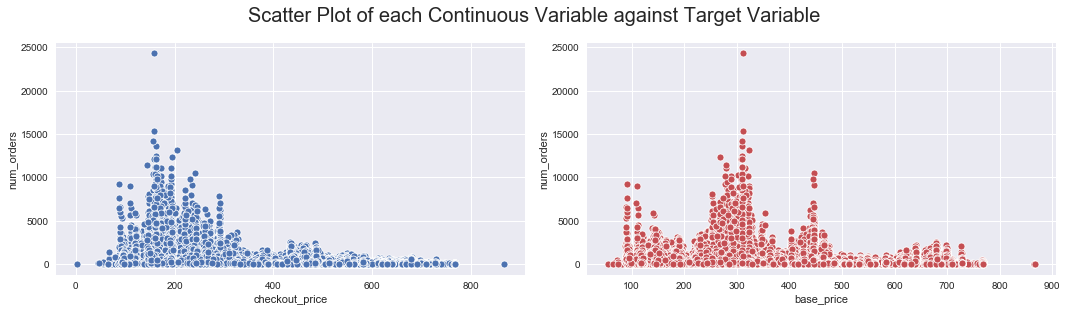

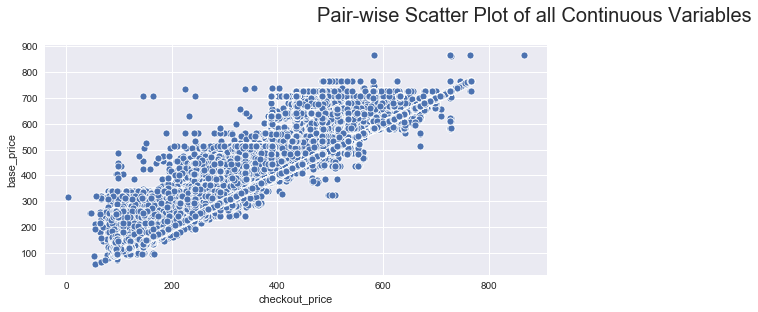

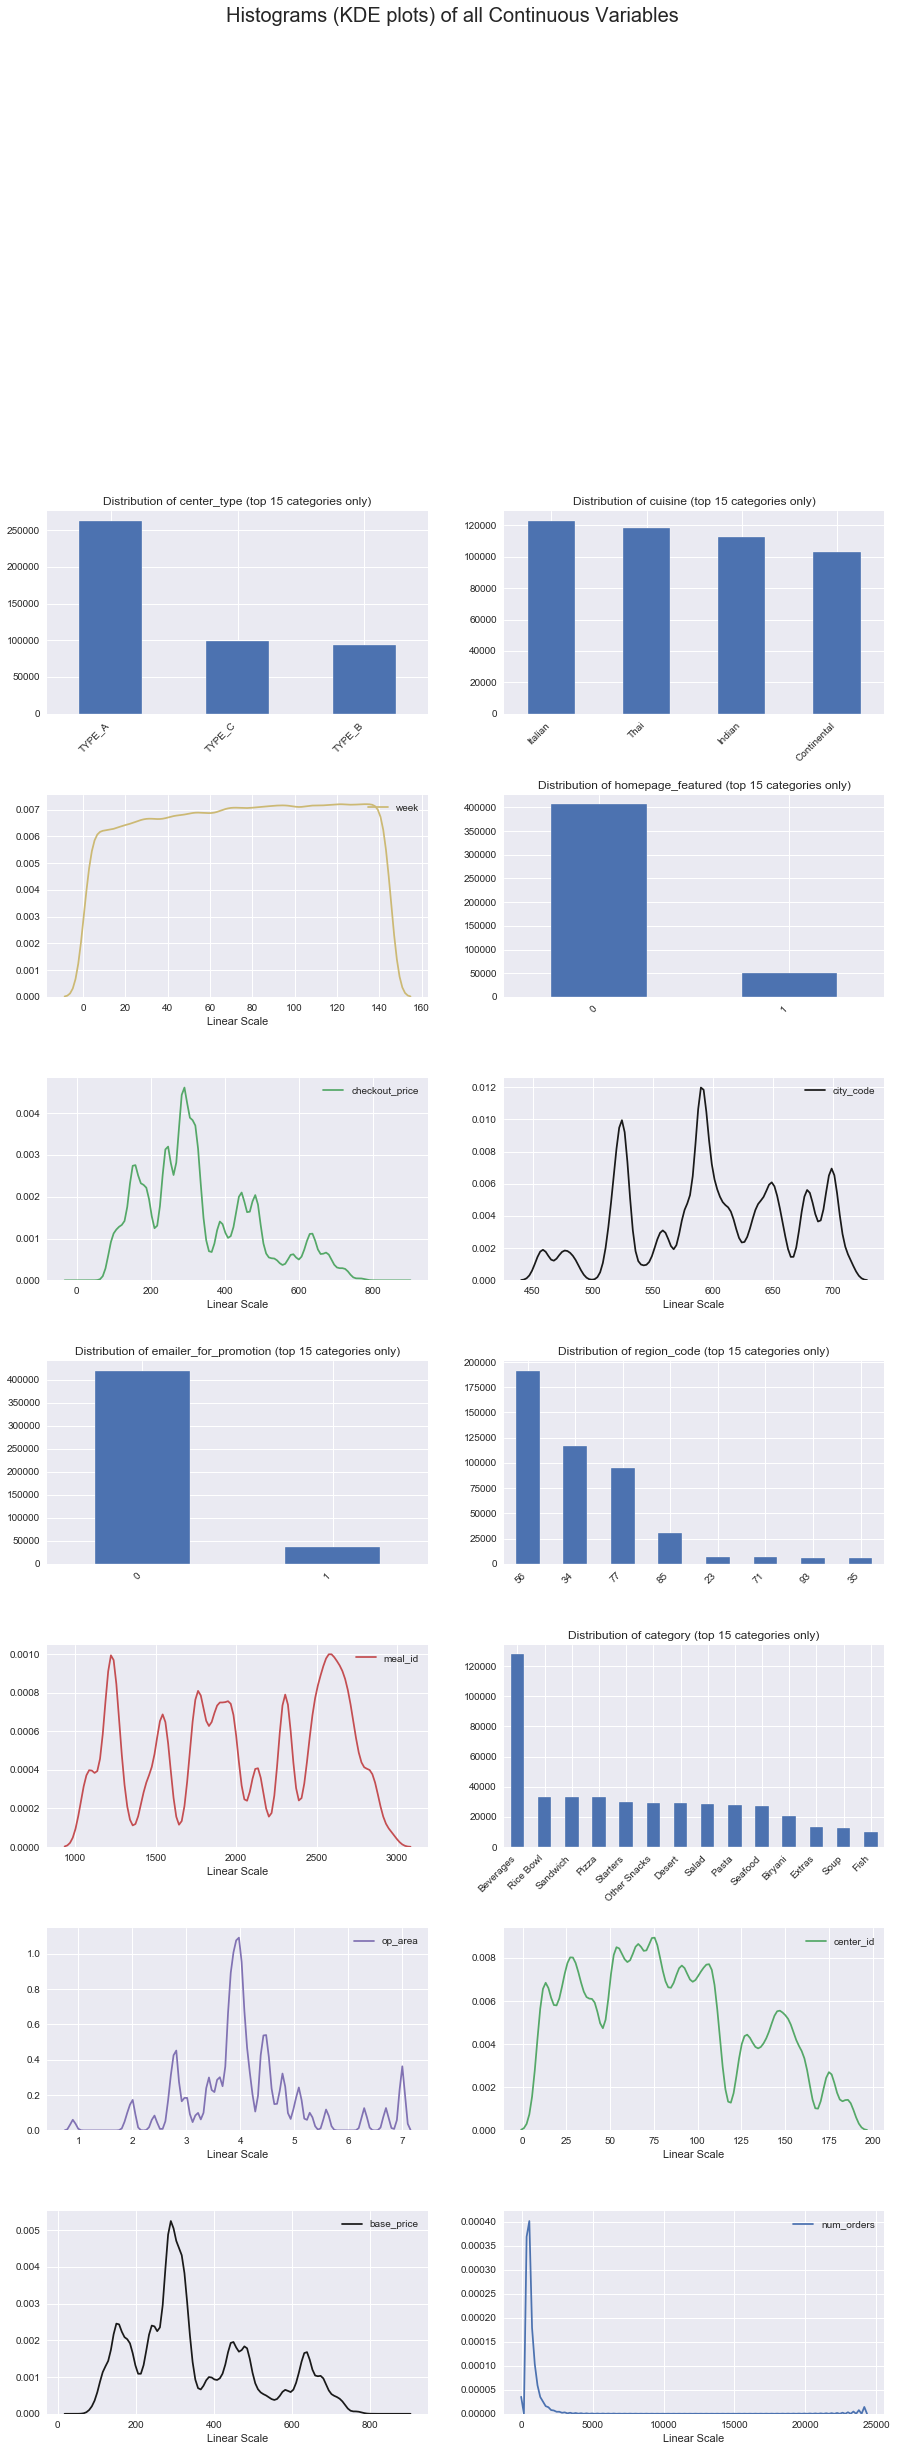

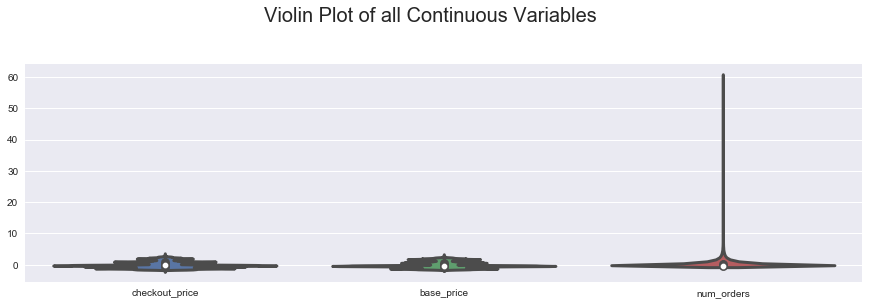

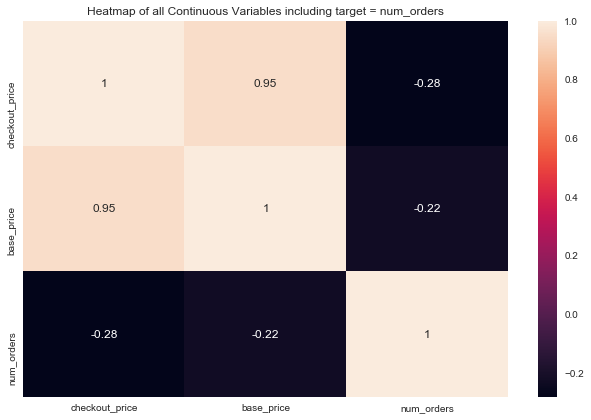

In [44]:
dft = AV.AutoViz(datapath+filename, sep=sep, depVar=target, dfte=None, header=0, verbose=2,
                            lowess=False,chart_format='svg',max_rows_analyzed=456548,max_cols_analyzed=30)

In [45]:
 import pytz
from datetime import datetime
# assuming now contains a timezone aware datetime
now = datetime.now()
tz = pytz.timezone('Asia/Kolkata')
your_now = now.astimezone(tz)
print (your_now)

2020-05-19 16:43:08.951736+05:30
